### 신세계 주가 분석
* 목표
    

### 신세계 기업개요
* 개요
  

* 대표 :
    

# 금융분석
 * 일일 주가분석
    - url:https://finance.naver.com/item/sise_day.nhn?code=004170&page=2
            

In [7]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup as bsp
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3

In [8]:
code='004170'
pgno=2
url='https://finance.naver.com/item/sise_day.nhn?code={0}&page={1}'
tgurl=url.format(code,pgno)
tgurl

'https://finance.naver.com/item/sise_day.nhn?code=004170&page=2'

In [9]:
def getPage(tgurl):
    headerdata = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.182 Safari/537.36',
    }
    src=requests.get(tgurl,headers=headerdata)
    cont=src.content.strip()
    html=bsp(cont, 'html.parser')
    tgts=html.select("table.type2 tr")
    stocklist=[]
    for t in tgts:
        sday=t.select(".gray03")
        tds=t.select('td')
        if(sday):
            tkey=sday[0].text.replace('.','')
            tday=sday[0].text.replace('.','-')
            topen=tds[3].text.replace(',','')
            thigh=tds[4].text.replace(',','')
            tlow=tds[5].text.replace(',','')
            tclose=tds[1].text.replace(',','')
            tvol=tds[6].text.replace(',','')
            stocklist.append([tday,topen,thigh,tlow,tclose,tvol,tkey])
    return stocklist

In [18]:
dbname='navernews(20210319_101850).db'
def dataprs(d=[]):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        if d :
            sql='select skey from stockp where skey={}'.format(d[6])
            checkkey=cur.execute(sql).fetchall()
            if checkkey:
                print("중복있음:",d[6])
            else:
                sql="insert into stockp (sday,sopen,shigh,slow,sclose,svol,skey) values(?,?,?,?,?,?,?)"
                cur.execute(sql,d)
                print('입력완료 - ',d[0])
        else:
            sql='select * from stockp'
            result=cur.execute(sql).fetchall()
            print(result)

In [17]:
for i in range(1,90):
    tgurl=url.format(code,i)
    slist=getPage(tgurl)
    for s in slist:
        dataprs(s)

입력완료 -  2021-04-02
입력완료 -  2021-04-01
입력완료 -  2021-03-31
입력완료 -  2021-03-30
입력완료 -  2021-03-29
입력완료 -  2021-03-26
입력완료 -  2021-03-25
입력완료 -  2021-03-24
입력완료 -  2021-03-23
입력완료 -  2021-03-22
입력완료 -  2021-03-19
입력완료 -  2021-03-18
입력완료 -  2021-03-17
입력완료 -  2021-03-16
입력완료 -  2021-03-15
입력완료 -  2021-03-12
입력완료 -  2021-03-11
입력완료 -  2021-03-10
입력완료 -  2021-03-09
입력완료 -  2021-03-08
입력완료 -  2021-03-05
입력완료 -  2021-03-04
입력완료 -  2021-03-03
입력완료 -  2021-03-02
입력완료 -  2021-02-26
입력완료 -  2021-02-25
입력완료 -  2021-02-24
입력완료 -  2021-02-23
입력완료 -  2021-02-22
입력완료 -  2021-02-19
입력완료 -  2021-02-18
입력완료 -  2021-02-17
입력완료 -  2021-02-16
입력완료 -  2021-02-15
입력완료 -  2021-02-10
입력완료 -  2021-02-09
입력완료 -  2021-02-08
입력완료 -  2021-02-05
입력완료 -  2021-02-04
입력완료 -  2021-02-03
입력완료 -  2021-02-02
입력완료 -  2021-02-01
입력완료 -  2021-01-29
입력완료 -  2021-01-28
입력완료 -  2021-01-27
입력완료 -  2021-01-26
입력완료 -  2021-01-25
입력완료 -  2021-01-22
입력완료 -  2021-01-21
입력완료 -  2021-01-20
입력완료 -  2021-01-19
입력완료 -  2021-01-18
입력완료 -  2021

입력완료 -  2019-06-07
입력완료 -  2019-06-05
입력완료 -  2019-06-04
입력완료 -  2019-06-03
입력완료 -  2019-05-31
입력완료 -  2019-05-30
입력완료 -  2019-05-29
입력완료 -  2019-05-28
입력완료 -  2019-05-27
입력완료 -  2019-05-24
입력완료 -  2019-05-23
입력완료 -  2019-05-22
입력완료 -  2019-05-21
입력완료 -  2019-05-20
입력완료 -  2019-05-17
입력완료 -  2019-05-16
입력완료 -  2019-05-15
입력완료 -  2019-05-14
입력완료 -  2019-05-13
입력완료 -  2019-05-10
입력완료 -  2019-05-09
입력완료 -  2019-05-08
입력완료 -  2019-05-07
입력완료 -  2019-05-03
입력완료 -  2019-05-02
입력완료 -  2019-04-30
입력완료 -  2019-04-29
입력완료 -  2019-04-26
입력완료 -  2019-04-25
입력완료 -  2019-04-24
입력완료 -  2019-04-23
입력완료 -  2019-04-22
입력완료 -  2019-04-19
입력완료 -  2019-04-18
입력완료 -  2019-04-17
입력완료 -  2019-04-16
입력완료 -  2019-04-15
입력완료 -  2019-04-12
입력완료 -  2019-04-11
입력완료 -  2019-04-10
입력완료 -  2019-04-09
입력완료 -  2019-04-08
입력완료 -  2019-04-05
입력완료 -  2019-04-04
입력완료 -  2019-04-03
입력완료 -  2019-04-02
입력완료 -  2019-04-01
입력완료 -  2019-03-29
입력완료 -  2019-03-28
입력완료 -  2019-03-27
입력완료 -  2019-03-26
입력완료 -  2019-03-25
입력완료 -  2019

In [58]:
def getDB():
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select * from stockp where skey > 20200101 order by skey asc'
        qry=cur.execute(sql)
        desc=[row[0] for row in qry.description]
        data=qry.fetchall()
    return((desc,data))

In [59]:
res=getDB()
res[0]
df=pd.DataFrame(data=res[1],columns=res[0]).set_index('sidx')
df.head()

,sday,sopen,shigh,slow,sclose,svol,skey
sidx,,,,,,,
310,2020-01-02,289500,296500,289500,292500,48510,20200102
309,2020-01-03,296500,297000,290500,292500,40984,20200103
308,2020-01-06,288000,294000,288000,290000,24759,20200106
307,2020-01-07,293000,311500,291500,305000,99705,20200107
306,2020-01-08,305000,312000,299000,306500,73747,20200108


In [60]:
cdf=df[['sday','sclose']].copy()
cdf.head()  # 종가만 뽑음(나중에 종가만 라벨링하기위해)  sday를 나중에 merge하려고
# 주말에 뉴스데이터는 나오지만 주가는 안나온다(뉴스를 수집해 금요일부터 월요일까지 주가를 이어보려한다.)

,sday,sclose
sidx,,
310,2020-01-02,292500
309,2020-01-03,292500
308,2020-01-06,290000
307,2020-01-07,305000
306,2020-01-08,306500


In [61]:
!pip install mpl-finance

In [62]:
import mpl_finance as mpf
from mpl_finance import candlestick_ohlc

In [63]:
df['mvshort']=df['sclose'].rolling(window=5).mean()
df['mvlong']=df['sclose'].rolling(window=8).mean()
df['stshort']=df['sopen'].rolling(window=5).mean()
df['stlong']=df['sopen'].rolling(window=8).mean()
df['svolb']=df['svol'].shift(1)
# 색정보
df['vcol']=np.where(df['svolb']>df['svol'],'blue','red')
df.fillna(0)

,sday,sopen,shigh,slow,sclose,svol,skey,mvshort,mvlong,stshort,stlong,svolb,vcol
sidx,,,,,,,,,,,,,
310,2020-01-02,289500,296500,289500,292500,48510,20200102,0.0,0.0,0.0,0.0,0.0,red
309,2020-01-03,296500,297000,290500,292500,40984,20200103,0.0,0.0,0.0,0.0,48510.0,blue
308,2020-01-06,288000,294000,288000,290000,24759,20200106,0.0,0.0,0.0,0.0,40984.0,blue
307,2020-01-07,293000,311500,291500,305000,99705,20200107,0.0,0.0,0.0,0.0,24759.0,red
306,2020-01-08,305000,312000,299000,306500,73747,20200108,297300.0,0.0,294400.0,0.0,99705.0,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2021-03-29,282000,282000,276000,277000,53284,20210329,276700.0,278312.5,277400.0,278812.5,104756.0,blue
4,2021-03-30,276500,279500,276000,279000,41692,20210330,277500.0,277687.5,276200.0,277687.5,53284.0,blue
3,2021-03-31,279000,281500,276500,281000,58150,20210331,279700.0,278125.0,277800.0,277625.0,41692.0,red


In [64]:
cdf=df.set_index('sday').fillna(0)
cdf.head()
candf=cdf[['sopen','shigh','slow','sclose']].astype(int)
candf.head()

,sopen,shigh,slow,sclose
sday,,,,
2020-01-02,289500,296500,289500,292500
2020-01-03,296500,297000,290500,292500
2020-01-06,288000,294000,288000,290000
2020-01-07,293000,311500,291500,305000
2020-01-08,305000,312000,299000,306500


In [71]:
import datetime
from matplotlib.dates import date2num
x=np.arange(len(cdf.index))
xs=np.reshape(x,(-1,1))
ohlc=candf.values
canohlc=np.hstack((xs,ohlc))
canohlc

array([[     0, 289500, 296500, 289500, 292500],
       [     1, 296500, 297000, 290500, 292500],
       [     2, 288000, 294000, 288000, 290000],
       ...,
       [   307, 279000, 281500, 276500, 281000],
       [   308, 282500, 283000, 277500, 279000],
       [   309, 278000, 278500, 274000, 274500]])

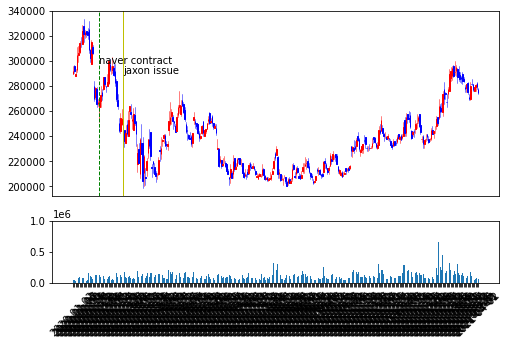

In [72]:
from matplotlib.gridspec import GridSpec
fig=plt.figure(figsize=(8,5))
gs=GridSpec(2,1,height_ratios=[3,1])
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[1,0],sharex=ax1) # x 축 공유
ax1.get_xaxis().set_visible(False) # 가운데 x 축 삭제
candlestick_ohlc(ax1,canohlc,width=0.5, colorup='r', colordown='b')
svol=df['svol'].values # vol
sx=df['sday'].values # x 축
ax2.bar(sx,svol,width=0.6)
ax2.set_ylim(0,1000000)
#ax1.set_xlim(0,20)
#ax1.set_ylim(100000,210000)
ax1.axvline(x=20, color='g', linestyle='--', linewidth=1)
ax1.text(20,298000,'naver contract')
ax1.axvline(x=38, color='y', linestyle='-', linewidth=1)
ax1.text(38,290000,'jaxon issue')
plt.xticks(rotation=45)
plt.show()

In [73]:
def mvline(src=[],mday=5):
    mvdata=[0 for i in range(mday-1)]
    mvdata
    tot =len(src)
    for i in range(tot-mday+1):
        mvm=np.mean(cdf['sclose'][i:mday+i])
        mvdata.append(mvm)
    return (mvdata)

In [74]:
cdf['mvshort']=mvline(cdf['sclose'],5)
cdf['mvlong']=mvline(cdf['sclose'],20)
cdf.head()

,sopen,shigh,slow,sclose,svol,skey,mvshort,mvlong,stshort,stlong,svolb,vcol,shortpos
sday,,,,,,,,,,,,,
2020-01-02,289500,296500,289500,292500,48510,20200102,0.0,0.0,0.0,0.0,0.0,red,0
2020-01-03,296500,297000,290500,292500,40984,20200103,0.0,0.0,0.0,0.0,48510.0,blue,0
2020-01-06,288000,294000,288000,290000,24759,20200106,0.0,0.0,0.0,0.0,40984.0,blue,0
2020-01-07,293000,311500,291500,305000,99705,20200107,0.0,0.0,0.0,0.0,24759.0,red,0
2020-01-08,305000,312000,299000,306500,73747,20200108,297300.0,0.0,294400.0,0.0,99705.0,blue,0


In [76]:
cdf['preshortpos']=cdf['shortpos'].shift(1)
cdf.tail(20)

,sopen,shigh,slow,sclose,svol,skey,mvshort,mvlong,stshort,stlong,svolb,vcol,shortpos,preshortpos
sday,,,,,,,,,,,,,,
2021-03-08,296000,297000,287000,288000,129915,20210308,288300.0,263250.0,284000.0,280000.0,164541.0,blue,1,1.0
2021-03-09,291500,300000,289000,291500,183899,20210309,291100.0,266050.0,287600.0,281687.5,129915.0,red,1,1.0
2021-03-10,292000,297000,288500,295000,141832,20210310,292200.0,268900.0,290800.0,283875.0,183899.0,blue,1,1.0
2021-03-11,294000,294500,282500,287500,305103,20210311,291300.0,271025.0,292300.0,287187.5,141832.0,red,1,1.0
2021-03-12,291000,296500,284000,287000,151836,20210312,289800.0,273275.0,292900.0,289375.0,305103.0,blue,1,1.0
2021-03-15,289000,291000,283500,285500,122671,20210315,289300.0,275350.0,291500.0,291000.0,151836.0,blue,1,1.0
2021-03-16,287000,288500,282500,285500,129795,20210316,288100.0,277325.0,290600.0,291062.5,122671.0,red,1,1.0
2021-03-17,289500,291000,282000,284000,154923,20210317,285900.0,278825.0,290100.0,291250.0,129795.0,red,1,1.0
2021-03-18,285500,287500,283000,284000,97938,20210318,285200.0,280475.0,288400.0,289937.5,154923.0,blue,1,1.0


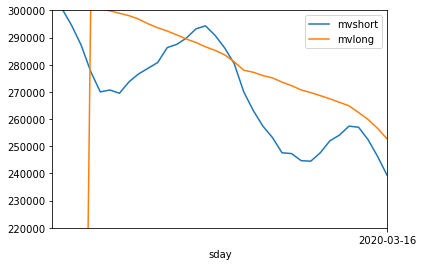

In [77]:
cdf[['mvshort','mvlong']].plot()
plt.xlim(15,50)
plt.ylim(220000,300000)
plt.show()

In [78]:
def finprs(df):
    fdf=df.copy()
    precre=0 # 이전 주식 잔고
    predeb=1000000 # 이전 통장 잔고
    prestock=0
    for idx,row in fdf.iterrows():
         # 살수 있는 주식의 갯수
        #단기물 곡선이 하위 포지션에 있다가 장기물 곡선을 크로스 하였다=> 주가 상승 압력이 시작됬다
        # 상승할것으로 보여지니 매수한다.
        if (row.loc['shortpos']==1 and row.loc['shortpos']*row.loc['preshortpos']<0):
            canbuy=predeb//row.loc['sclose']
            if(canbuy>0):
                #산다
                cre=precre+canbuy*row.loc['sclose']
                deb=predeb-canbuy*row.loc['sclose']
                instock=canbuy
            else:# 돈없어서 아무일 없다
                instock=prestock
                cre=precre
                deb=predeb                
        # 단기물 곡선이 상위포지션에 있다가 장기물 곡선을 크로스했다--> 주가의 하방압력이 시작됬다.
        # 하락할것으로 보여지니 매도한다.
        elif (row.loc['shortpos']==-1 and row.loc['shortpos']*row.loc['preshortpos']<0):
            cre=0
            deb=predeb+row.loc['sclose']*prestock
            instock=0
            # sellpos:1 prestock:1,sellpos:-1 prestock:0, no debt
        else:# 조건이 안맞아서 아무일 없다.
            instock=prestock
            cre=precre
            deb=predeb
        fdf.loc[idx,'hasstock']=instock
        fdf.loc[idx,'debt']=deb
        fdf.loc[idx,'credit']=cre
        prestock=instock
        precre=cre
        predeb=deb
    return fdf

In [79]:
rdf=finprs(cdf)
rdf['totval']=rdf['debt']+rdf['credit']
rdf.tail()

,sopen,shigh,slow,sclose,svol,skey,mvshort,mvlong,stshort,stlong,svolb,vcol,shortpos,preshortpos,hasstock,debt,credit,totval
sday,,,,,,,,,,,,,,,,,,
2021-03-29,282000,282000,276000,277000,53284,20210329,276700.0,284200.0,277400.0,278812.5,104756.0,blue,-1,-1.0,0.0,749500.0,0.0,749500.0
2021-03-30,276500,279500,276000,279000,41692,20210330,277500.0,284275.0,276200.0,277687.5,53284.0,blue,-1,-1.0,0.0,749500.0,0.0,749500.0
2021-03-31,279000,281500,276500,281000,58150,20210331,279700.0,283850.0,277800.0,277625.0,41692.0,red,-1,-1.0,0.0,749500.0,0.0,749500.0
2021-04-01,282500,283000,277500,279000,72605,20210401,279500.0,283200.0,280400.0,278125.0,58150.0,red,-1,-1.0,0.0,749500.0,0.0,749500.0
2021-04-02,278000,278500,274000,274500,57817,20210402,278100.0,282200.0,279600.0,277562.5,72605.0,blue,-1,-1.0,0.0,749500.0,0.0,749500.0


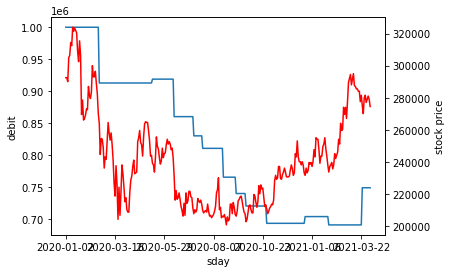

In [80]:
ax1=rdf['totval'].plot()
ax1.set_ylabel('debit')
ax2 = rdf['sclose'].plot(secondary_y=True, color='r')
ax2.set_ylabel('stock price')
plt.show()